In [221]:
 # IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [234]:
#LOAD THE CSV FILE & USE THE COLOUMN'S 0 and 6
df = pd.read_csv('../data/dftRoadSafetyData_Accidents_2018.csv',usecols=[0,6],index_col=0,low_memory=False)
df
df.head(10)

,Accident_Severity
Accident_Index,
2018010080971,3
2018010080973,3
2018010080974,3
2018010080981,2
2018010080982,2
2018010080983,3
2018010080986,2
2018010080987,3
2018010080990,3


In [235]:
#df.dropna(inplace=True)
#df

In [236]:
#Rename column
df.columns = ['Severe']
#set the type as categorical
df['Severe'] = df['Severe'].astype('category')
df.dtypes

Severe    category
dtype: object

In [238]:
#Print the top 15 rows
df.head(15)

,Severe
Accident_Index,
2018010080971,3
2018010080973,3
2018010080974,3
2018010080981,2
2018010080982,2
2018010080983,3
2018010080986,2
2018010080987,3
2018010080990,3


In [239]:
#Rename the Accident severity categories
sev = {
    'Fatal',
    'Serious',
    'Slight',
}
df['Severe'] = df['Severe'].cat.rename_categories(['Fatal', 'Serious', 'Slight'])
df.head(15)

,Severe
Accident_Index,
2018010080971,Slight
2018010080973,Slight
2018010080974,Slight
2018010080981,Serious
2018010080982,Serious
2018010080983,Slight
2018010080986,Serious
2018010080987,Slight
2018010080990,Slight


In [240]:
#Set the categorical type as ordinal. 
sev = {
    'Fatal',
    'Serious',
    'Slight',
}
df['Severe'] = df['Severe'].astype(
    pd.CategoricalDtype(ordered=True, 
                        categories=sev))
df

,Severe
Accident_Index,
2018010080971,Slight
2018010080973,Slight
2018010080974,Slight
2018010080981,Serious
2018010080982,Serious
...,...
2018984115718,Slight
2018984115918,Slight
2018984116018,Slight


In [241]:
#Count the total number categories
counts = df['Severe'].value_counts(sort=True)
counts

Slight     97799
Serious    23165
Fatal       1671
Name: Severe, dtype: int64

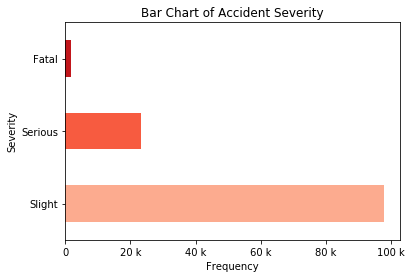

In [242]:
#Plot the bar chart of the Accident Severities
ax = counts.plot.barh(color=plt.cm.Reds(np.linspace(0.3, 1.5, 6)))
ax.set_title("Bar Chart of Accident Severity") 
ax.set_ylabel('Severity')
ax.set_xlabel('Frequency')
ax.xaxis.set_major_formatter(
mpl.ticker.EngFormatter(places=0))
plt.savefig("Accident-Severity.png", dpi=300, bbox_inches='tight')
plt.show()